In [2]:
import numpy as np, plottools as pl, healpy as hp, local, tools_cmb, binning as bn, tools_qrec, curvedsky as cs, pickle, tools_cib
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [3]:
aobj = local.init_analysis(freq='143',dtype='full',wind='Lmask')

In [4]:
klm = hp.read_alm('/global/homes/t/toshiyan/Work/Ongoing/plk/data/PR3_local/lens/COM_Lensing_4096_R3.00/MV/dat_klm.fits')
klm = cs.utils.lm_healpy2healpix( klm, 4096 )[:2049,:2049]

In [6]:
Wlen = hp.read_map('/global/homes/t/toshiyan/Work/Ongoing/plk/data/PR3_local/lens/COM_Lensing_4096_R3.00/mask.fits')

In [8]:
iobj = tools_cib.init_cib(dtype='gnilc',wind='G60')

In [9]:
Ilm = pickle.load(open(iobj.falm[0],"rb"))

In [10]:
clIk = cs.utils.alm2cl(2048,klm,Ilm)
clII = cs.utils.alm2cl(2048,Ilm)

In [11]:
Wcib = hp.fitsfunc.read_map(iobj.famask,verbose=False)
wfac = np.mean(Wcib*Wlen**2)

In [12]:
mb = bn.multipole_binning(lmin=10,lmax=2048,n=15)

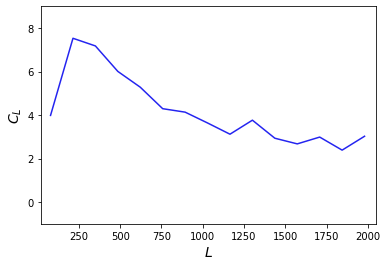

In [13]:
pl.plot_1dstyle(ymin=-1,ymax=9)
cbIkb = bn.binning(clIk*aobj.l,mb)/wfac
plot(mb.bc,cbIkb*1e6*2.726*0.0059757149*9113.0590)

In [13]:
cbIk = bn.binning(clIk,mb)
cbII = bn.binning(clII,mb)
cbkk = bn.binning(aobj.ckk,mb)

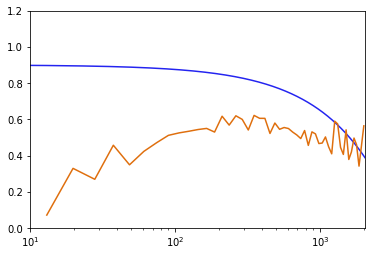

In [35]:
xscale('log')
xlim(10,2048)
ylim(0,1.2)
plot(aobj.l, (0.4-0.9)/(2000.)*aobj.l+0.9)
plot(mb.bc,cbIk/np.sqrt(cbII*cbkk*w2))